# MNIST Classification

## Machine Learning Regression Algorithm Selection

*Eduardo Solano Jaime*

*0213663*

*ECID*

*Universidad Panamericana campus Guadalajara*

---

## Abstract

This report presents a comprehensive study on the selection of an optimal machine learning clustering algorithm for the ['Spotify unpopular songs'](https://www.kaggle.com/datasets/estienneggx/spotify-unpopular-songs) dataset. The goal is to develop a robust model that accurately cluster the 400s most unpopular songs in Spotify through 2022. The process begins with data preparation and processing, followed by feature engineering to extract meaningful attributes from the songs. Various machine learning models are then built and rigorously tested on these features. The performance of each model is evaluated using appropriate metrics. Finally, cross-validation techniques are employed to ensure the model’s generalizability and to determine the most effective clustering method. The findings of this report contribute to the ongoing efforts in the field of audio clustering, a field in which I, on a more personal note, am very interested.
The full code is available in my [github repository](https://github.com/esolanoo/MNIST-Classification).

## Methodology

1. **Goal Setting**: Define the objective of your project. In this case, it is to cluster unpopular songs from the dataset.

2. **Data Preparation**: Load the dataset and split it into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.

3. **Data Processing**: This step can help improve the performance of many machine learning algorithms.

4. **Feature Engineering**: In this step, new features are cast from the existing ones.

5. **Model Building**: Train different machine learning models on the processed data.

6. **Model Testing**: Evaluate the performance of each model on the testing set.

7. **Cross-Validation**: Perform k-fold cross-validation and other methods to assess how well your model generalizes to unseen data.

8. **Model Selection**: Based on the cross-validation results, select the model that performs the best on the validation sets.

9. **Final Evaluation**: Finally, evaluate the performance of your selected model on the testing set.

## Load the dataset

In [156]:
# pip install scikit-plot

In [264]:
import pandas as pd
import numpy as np
from scipy.stats import yeojohnson, shapiro, zscore

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import seaborn as sea

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scikitplot as skplt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import random
from itertools import product
import warnings

In [240]:
random.seed(5338)
warnings.filterwarnings("ignore",category=FutureWarning)
pd.set_option("display.precision", 3)
sea.set_style('white')
sea.set_palette('viridis')

In [243]:
songs = pd.read_csv('unpopular_songs.csv').drop(['track_id', 'track_name'], axis=1)
genres = pd.read_csv('z_genre_of_artists.csv')
songs.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.722   0.476    5    -8.203     1        0.090         0.670   
1         0.955   0.281    0   -11.392     0        0.466         0.005   
2         0.753   0.355    8   -11.799     1        0.514         0.573   
3         0.650   0.331    3   -10.818     0        0.383         0.865   
4         0.690   0.360    4   -15.624     0        0.455         0.764   

   instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
0             0.000     0.093    0.927  151.968       220549     False   
1             0.059     0.122    0.093  127.991       149543      True   
2             0.000     0.073    0.600   91.978       130019      True   
3             0.000     0.105    0.581   99.513       116193      True   
4             0.000     0.181    0.105   89.893       111827      True   

   popularity track_artist  
0           8      El Javi  
1           0         Br80  
2           0   JpThaRuler  
3           0   JpThaRuler  
4           0   JpThaRuler

In [218]:
songs.shape

(4073, 15)

In [219]:
genres.head()

Unnamed: 0 artist_name               artist_id               genre
0           0     El Javi  6qZksHG4gzbRx3FZplO4Ls                  []
1           1        Br80  3x0tOQYysaBspzDp0PGDoM                  []
2           2  JpThaRuler  1n5X8uMaNKFI4BAXFpD2AZ  ['westcoast flow']
3           3     Jimmy D  7g0eqYROzcQjp6Jflh7dPT                  []
4           4      Kafime  2PkEwFBI1VcQL5VYtFMd9h                  []

The *genres* dataset needs to be cleaned and processed before any analysis can be performed.

In [220]:
genres[genres['genre']=='[]'].count()

Unnamed: 0     519
artist_name    519
artist_id      519
genre          519
dtype: int64

In [221]:
genres['genre'].replace('[]', "['Unknown']", inplace=True)
genres['genre'] = genres['genre'].apply(lambda x: x[2:-2])
genres.head()

Unnamed: 0 artist_name               artist_id           genre
0           0     El Javi  6qZksHG4gzbRx3FZplO4Ls         Unknown
1           1        Br80  3x0tOQYysaBspzDp0PGDoM         Unknown
2           2  JpThaRuler  1n5X8uMaNKFI4BAXFpD2AZ  westcoast flow
3           3     Jimmy D  7g0eqYROzcQjp6Jflh7dPT         Unknown
4           4      Kafime  2PkEwFBI1VcQL5VYtFMd9h         Unknown

### Datasets merging

Both datasets can be merged on the name of the artists that performs the song. With a the 519 examples, as seen with `genres[genres['genre']=='[]'].count()`, of unknown genres, we can safely drop them by merging on using `how='inner'`in the `DataFrame.merge` method.




In [222]:
songs = songs.merge(genres[['artist_name', 'genre']], left_on='track_artist', right_on='artist_name', how='inner')
songs.drop('artist_name', axis=1, inplace=True)
songs.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.722   0.476    5    -8.203     1        0.090         0.670   
1         0.722   0.476    5    -8.203     1        0.090         0.670   
2         0.765   0.278    5    -7.383     1        0.036         0.810   
3         0.765   0.278    5    -7.383     1        0.036         0.810   
4         0.955   0.281    0   -11.392     0        0.466         0.005   

   instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
0             0.000     0.093    0.927  151.968       220549     False   
1             0.000     0.093    0.927  151.968       220549     False   
2             0.000     0.058    0.809  129.915       221547     False   
3             0.000     0.058    0.809  129.915       221547     False   
4             0.059     0.122    0.093  127.991       149543      True   

   popularity track_artist    genre  
0           8      El Javi  Unknown  
1           8      El Javi  Unknown  
2           8      El Javi  Unknown  
3           8      El Javi  Unknown  
4           0         Br80  Unknown

In [223]:
categorical_cols = ['key','mode', 'explicit', 'popularity', 'track_artist', 'genre']
time_col = 'duration_ms'
audio_cols = [col for col in songs.columns if col not in categorical_cols and col != time_col]

## Data Exploration

* Danceability: Danceability describes how suitable a track is for dancing.
* Energy: Energy is a measure of intensity and activity.
* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
* Speechiness: Speechiness detects the presence of spoken words in a track.
* Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* Instrumentalness: Detects the presence of spoken words in a track. Higher liveness values represent higher confidence the track contains spoken words.
* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent higher confidence that the track was performed live.
* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
* Duration_ms: The overall duration of a track in milliseconds
* Key: The key the track is in, as defined by the International Organization for Standardization. Integers map to pitches using standard Pitch Class notation.
* Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived
* Popularity: The popularity of a track. The value will be between 0 and 10, with 10 being the most 'popular'
* Trac_artist: The name of the artist
* Genre: The name of the genre
* Explicit: Whether the track is explicit or not

In [224]:
songs.describe().T

count        mean         std        min         25%  \
danceability      4115.0       0.588       0.190  0.000e+00       0.465   
energy            4115.0       0.525       0.251  1.970e-05       0.360   
key               4115.0       5.062       3.598  0.000e+00       2.000   
loudness          4115.0     -11.161       5.988 -4.305e+01     -13.518   
mode              4115.0       0.656       0.475  0.000e+00       0.000   
speechiness       4115.0       0.147       0.171  0.000e+00       0.039   
acousticness      4115.0       0.347       0.341  0.000e+00       0.038   
instrumentalness  4115.0       0.218       0.360  0.000e+00       0.000   
liveness          4115.0       0.189       0.166  1.650e-02       0.098   
valence           4115.0       0.462       0.265  0.000e+00       0.254   
tempo             4115.0     120.003      31.138  0.000e+00      96.001   
duration_ms       4115.0  223716.282  262502.719  1.795e+04  142568.000   
popularity        4115.0       1.254       2.290  0.000e+00       0.000   

                        50%         75%        max  
danceability      6.040e-01       0.730  9.730e-01  
energy            5.440e-01       0.709  1.000e+00  
key               5.000e+00       8.000  1.100e+01  
loudness         -9.693e+00      -7.063  4.160e-01  
mode              1.000e+00       1.000  1.000e+00  
speechiness       6.170e-02       0.217  9.620e-01  
acousticness      2.170e-01       0.624  9.960e-01  
instrumentalness  3.680e-05       0.352  1.000e+00  
liveness          1.220e-01       0.220  9.900e-01  
valence           4.480e-01       0.665  9.870e-01  
tempo             1.200e+02     140.057  2.160e+02  
duration_ms       1.897e+05  244950.000  3.409e+06  
popularity        0.000e+00       1.000  9.000e+00

Some important insisght from the descriptive statistics can be drawn below.

1. Danceability: A low standard deviation might indicate a small range of variety of danceability levels among the songs.
1. Energy: A high mean in the ‘energy’ attribute might suggest that the songs in the dataset are generally fast and noisy. A high standard deviation might indicate that most songs have difgferent energy levels.
1. Loudness: If the maximum loudness is significantly higher than the 75th percentile, it could indicate that there are a few exceptionally loud songs in the dataset.
1. Speechiness: A low mean in speechiness might suggest that the songs contain very few spoken words. It may indicate that the songs are more instrumental.
1. Instrumentalness: If the 25th percentile of instrumentalness is close to 1, it suggests that at least 25% of the songs are purely instrumental.
1. Valence: A low mean valence might suggest that the songs in the dataset are generally more sad or angry.
1. Tempo: there should not be songs with 0 in tempo
1. Duration: A high standard deviation in duration might suggest a wide variety of song lengths in the dataset.

In [225]:
songs = songs[songs['tempo'] != 0]

In [226]:
songs.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_artist        0
genre               0
dtype: int64

In [227]:
songs.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
explicit               bool
popularity            int64
track_artist         object
genre                object
dtype: object

## Data Visualization and Preprocessing

In [228]:
temp = audio_cols + [time_col]
fig = make_subplots(rows=1, cols=len(temp))

for i, col in enumerate(temp, start=1):
    fig.add_trace(go.Box(y=songs[col], notched=True, name=col), row=1, col=i)

fig.update_layout(title='Boxplots of Audio and Time Columns', showlegend=False)
fig.show()

In [229]:
fig = make_subplots(rows=len(temp)//2, cols=2, subplot_titles=temp)
fig.update_layout(autosize=False,
                  width=800,
                  height=800,)

for i, col in enumerate(temp):
    fig.add_trace(go.Histogram(x = songs[col]), row=i//2+1, col=i%2+1)

fig.update_layout(title='Histogram of Audio and Time Columns', showlegend=False)
fig.show()

The outliers are more apparent in the loudness, speechiness, instrumentalness, liveness, tempo, and duration_ms variables. Skewness is present in the same variables as well as the tempo variable.
Yeo-Johnson transformation can be applied to target those issues, and some of the other variable can benefit from it as well.
Accousticness and instrumentalness are removd from further modifications due to the lack of normality.

### Outliers

In [230]:
outliers = ['loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
yeo_johnson = [x for x in temp if x!='acousticness' and x!='instrumentalness']

In [231]:
songs = songs[(np.abs(zscore(songs[outliers])) < 3).all(axis=1)]

In [232]:
for column in yeo_johnson:
  songs[column], _ = yeojohnson(songs[column])

In [233]:
fig = make_subplots(rows=1, cols=len(outliers), subplot_titles=outliers)

for i, col in enumerate(outliers, start=1):
    fig.add_trace(go.Box(y=songs[col], name=col, notched=True), row=1, col=i)

fig.update_layout(title='Boxplots of Audio and Time Columns after Outliers Removal and Yeo-Johnson', showlegend=False)
fig.show()

Although most of the outliers are removed, there are still some that are not. They can be further removed by using the Yeo-Johnson transformation, whic is applied to help the other variables achieve normality too.

In [234]:
fig = make_subplots(rows=len(yeo_johnson)//2, cols=2, subplot_titles=yeo_johnson)
fig.update_layout(autosize=False,
                  width=800,
                  height=800,)

for i, col in enumerate(yeo_johnson):
    fig.add_trace(go.Histogram(x = songs[col]), row=i//2+1, col=i%2+1)

fig.update_layout(title='Histograms of Audio and Time Columns after Outliers Removal and Yeo-Johnson', showlegend=False)
fig.show()

From visual inspection, assumtions can be made about the distribution of the variables, but a mathematical test can be applied to identify normally distributed variables to determine which columns are to be normalized and which are to be standardized.

In [235]:
normal = []
non_normal = []

for column in songs[temp].columns:
    stat, p = shapiro(songs[column])
    if p >= 0.05:
        normal.append(column)
    else:
        non_normal.append(column)

print(f'Normal columns: {normal}')
print(f'Non-normal columns: {non_normal}')

Normal columns: []
Non-normal columns: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


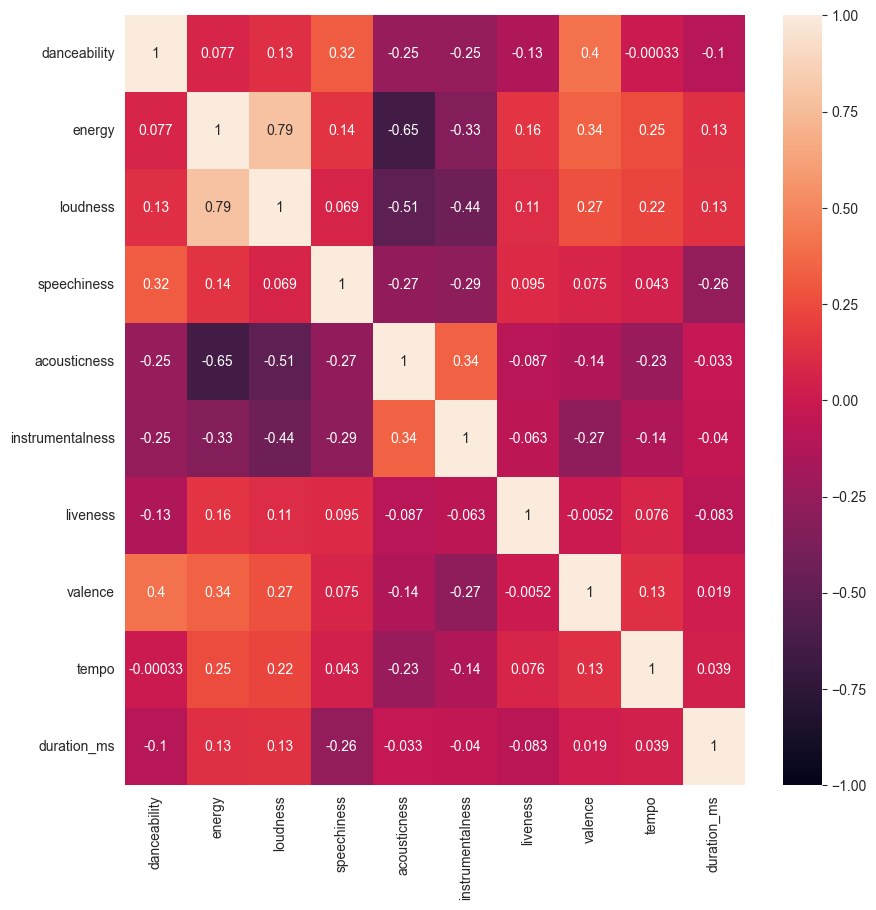

In [236]:
correlation = songs[temp].corr()
fig1 = plt.figure(figsize=(10,10))
ax = sea.heatmap(correlation, annot=True, vmin=-1, vmax=1)
plt.show()
fig1.savefig('Correlation Heatmap.png', dpi=600, bbox_inches='tight')

## Data Transformation

In [237]:
ct = ColumnTransformer(
  transformers=[
      ('non_normal', MinMaxScaler(), non_normal),
      ('categorical', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), categorical_cols)
      ],
  remainder='passthrough', verbose_feature_names_out=False
)

songs = pd.DataFrame(ct.fit_transform(songs).toarray(), columns=ct.get_feature_names_out())
songs.sample(5)

danceability  energy  loudness  speechiness  acousticness  \
2592         0.749   0.499     0.274        0.962         0.171   
2537         0.399   0.699     0.399        0.843         0.477   
1384         0.531   0.502     0.281        0.869         0.061   
2572         0.729   0.344     0.130        0.899         0.340   
3642         0.744   0.439     0.173        0.851         0.651   

      instrumentalness  liveness  valence  tempo  duration_ms  ...  \
2592         0.000e+00     0.486    0.643  0.745        0.454  ...   
2537         0.000e+00     0.959    0.641  0.430        0.453  ...   
1384         4.201e-06     0.482    0.414  0.709        0.488  ...   
2572         0.000e+00     0.591    0.316  0.652        0.578  ...   
3642         0.000e+00     0.594    0.916  0.389        0.505  ...   

      genre_tejano', 'tex-mex  genre_texas hardcore  genre_texas latin rap  \
2592                      0.0                   0.0                    0.0   
2537                      0.0                   0.0                    0.0   
1384                      0.0                   0.0                    0.0   
2572                      0.0                   0.0                    0.0   
3642                      0.0                   0.0                    0.0   

      genre_tololoche  genre_trap queen  genre_turntablism', 'wonky  \
2592              0.0               0.0                         0.0   
2537              0.0               0.0                         0.0   
1384              0.0               0.0                         0.0   
2572              0.0               0.0                         0.0   
3642              0.0               0.0                         0.0   

      genre_urban contemporary  genre_westcoast flow  genre_white noise  \
2592                       0.0                   0.0                0.0   
2537                       0.0                   0.0                0.0   
1384                       0.0                   0.0                0.0   
2572                       0.0                   0.0                0.0   
3642                       0.0                   0.0                0.0   

      genre_workout product  
2592                    0.0  
2537                    0.0  
1384                    0.0  
2572                    0.0  
3642                    0.0  

[5 rows x 795 columns]

In [238]:
pca = PCA(len(songs.columns))
pca.fit(songs)
songs_pca= pca.transform(songs)
#for i in range(len(songs.columns)):
#  print(f"PC {i+1}: {round(pca.explained_variance_ratio_[:i].sum()*100, 2)}%")

print(f"~80% of explained variance is accounted for the first 75 principal components")
print(f"PC[:75] = {pca.explained_variance_ratio_[:75].sum()*100}%")

~80% of explained variance is accounted for the first 75 principal components
PC[:74] = 80.10188231859617%


In [239]:
songs_pca = songs_pca[:, :75]
pd.DataFrame(songs_pca, columns = [f"PC_{i+1}" for i in range(75)]).sample(5)

PC_1   PC_2   PC_3   PC_4   PC_5   PC_6   PC_7   PC_8   PC_9  PC_10  \
502   0.567 -1.180  0.001  0.086  0.572  0.204 -0.208  0.039  0.089  0.122   
1323 -0.679  0.886  0.565  0.110 -0.367  0.499 -0.518  0.026  0.352  0.044   
3681 -0.083 -0.536 -0.371  0.845 -0.219 -0.202  0.195 -0.004 -0.198 -0.003   
821   0.565 -1.114 -0.162  0.071  0.402 -0.215 -0.406  0.692  0.034 -0.224   
2264  0.070 -0.662 -0.320  0.768 -0.199 -0.155  0.156  0.004 -0.149  0.076   

      ...  PC_66  PC_67  PC_68  PC_69      PC_70  PC_71  PC_72      PC_73  \
502   ... -0.006 -0.012 -0.006 -0.002 -1.612e-03 -0.009  0.005 -6.047e-04   
1323  ... -0.025 -0.006  0.005  0.005 -5.672e-03  0.013 -0.015 -3.428e-04   
3681  ... -0.253 -0.199  0.026  0.100 -2.900e-04  0.037 -0.056  2.656e-02   
821   ... -0.004 -0.006 -0.008  0.021 -3.916e-03 -0.004 -0.010  5.206e-03   
2264  ... -0.054 -0.004  0.004  0.146 -1.827e-02  0.012 -0.044  1.152e-02   

      PC_74  PC_75  
502   0.004  0.003  
1323 -0.005 -0.014  
3681  0.007 -0.037  
821   0.003 -0.014  
2264 -0.014 -0.025  

[5 rows x 75 columns]

Therefore, the first 75 principal components are linearly related to the different features in the following table. Each coefficient represents the correlation between a particular pair of components and features.

In [182]:
pd.DataFrame(pca.components_[:75], columns=songs.columns, index=[f"PC_{i+1}" for i in range(75)])

danceability  energy  loudness  speechiness  acousticness  \
PC_1     -1.185e-01  -0.079    -0.029       -0.351         0.204   
PC_2      6.610e-02   0.124     0.063        0.186        -0.220   
PC_3     -4.292e-02  -0.086    -0.051       -0.044         0.128   
PC_4      5.793e-02   0.226     0.086        0.032        -0.241   
PC_5     -4.240e-02  -0.286    -0.125        0.201         0.264   
...             ...     ...       ...          ...           ...   
PC_71     1.915e-02   0.083    -0.169       -0.026         0.010   
PC_72     4.040e-04   0.024    -0.036        0.018         0.007   
PC_73     4.574e-04  -0.013     0.002        0.004        -0.005   
PC_74     9.418e-04  -0.011     0.020       -0.004        -0.003   
PC_75     5.335e-03   0.013     0.007       -0.003         0.010   

       instrumentalness   liveness    valence      tempo  duration_ms  ...  \
PC_1          2.495e-01 -2.452e-02 -3.999e-02 -1.534e-02    4.749e-02  ...   
PC_2         -1.774e-01  3.196e-02  1.729e-02  3.602e-02    8.006e-04  ...   
PC_3          1.935e-01 -3.175e-03 -8.369e-02 -2.644e-02    5.390e-03  ...   
PC_4         -2.844e-01  8.727e-03  1.928e-01  5.188e-02    3.717e-02  ...   
PC_5          2.436e-01 -3.098e-02 -3.097e-01 -8.178e-02   -8.199e-02  ...   
...                 ...        ...        ...        ...          ...  ...   
PC_71        -1.292e-02 -7.490e-04 -1.060e-02 -7.626e-03   -2.514e-02  ...   
PC_72        -2.503e-03 -2.376e-03 -4.060e-03  4.717e-04   -1.455e-02  ...   
PC_73         8.668e-04  3.996e-03  3.119e-03  3.624e-03    1.394e-02  ...   
PC_74        -2.390e-03  3.675e-03  6.895e-04  1.990e-03   -9.726e-04  ...   
PC_75         1.498e-03 -6.576e-04 -6.665e-03  2.216e-03   -1.252e-02  ...   

       genre_tejano', 'tex-mex  genre_texas hardcore  genre_texas latin rap  \
PC_1                 3.611e-04             8.360e-04              4.743e-04   
PC_2                -1.318e-05             2.447e-03             -1.043e-03   
PC_3                -5.600e-04            -4.373e-04             -3.060e-04   
PC_4                 8.991e-04             4.464e-03              2.592e-03   
PC_5                -6.115e-04             4.951e-03             -1.571e-03   
...                        ...                   ...                    ...   
PC_71                1.950e-03             3.318e-03              3.774e-03   
PC_72               -2.448e-03             8.891e-03             -2.332e-03   
PC_73               -2.664e-04            -3.266e-03             -1.487e-04   
PC_74                9.071e-04            -1.548e-03              1.175e-03   
PC_75                3.990e-04             1.977e-03             -2.695e-04   

       genre_tololoche  genre_trap queen  genre_turntablism', 'wonky  \
PC_1         3.934e-05        -5.527e-04                  -1.481e-04   
PC_2         2.320e-04         8.862e-04                  -2.372e-03   
PC_3        -5.282e-04        -1.396e-03                  -4.540e-04   
PC_4         9.249e-04         2.232e-03                   1.172e-02   
PC_5         2.072e-04         1.333e-03                   2.326e-04   
...                ...               ...                         ...   
PC_71        8.718e-04        -2.803e-04                  -9.559e-03   
PC_72       -1.319e-03         5.198e-03                  -9.817e-02   
PC_73        5.745e-05        -7.917e-04                  -1.009e-02   
PC_74        8.844e-05        -3.461e-03                   2.833e-02   
PC_75        6.025e-04        -2.232e-03                   1.367e-02   

       genre_urban contemporary  genre_westcoast flow  genre_white noise  \
PC_1                 -2.364e-04            -6.685e-03          4.162e-03   
PC_2                 -2.084e-03            -2.820e-03         -1.037e-02   
PC_3                 -2.032e-03            -9.750e-04          8.978e-04   
PC_4                  4.969e-03             9.238e-03          7.514e-04   
PC_5                  9.990e-04             1.985e-02      

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\2640235069.py:13: UserWarning:

There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword

C:\Users\Eduardo\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning:

There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword

C:\Users\Eduardo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword



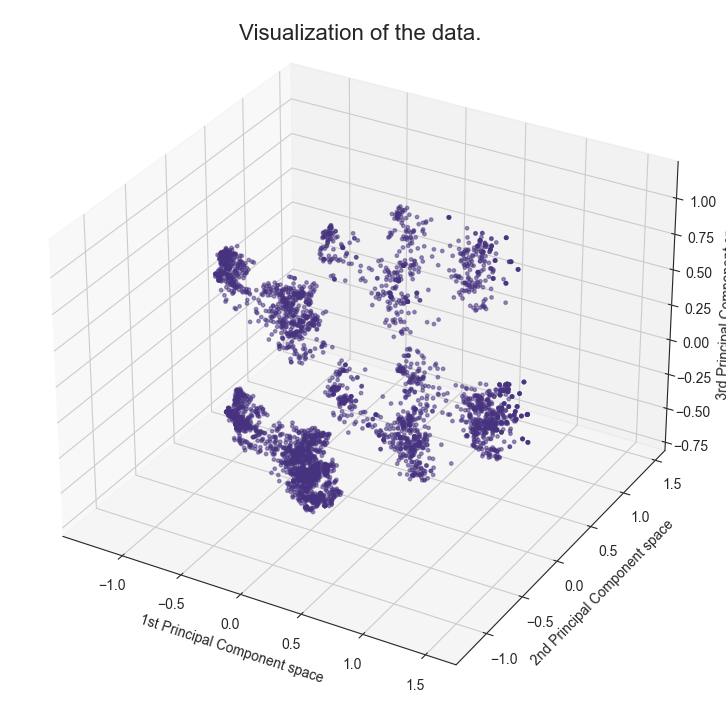

In [270]:
fig = plt.figure(constrained_layout=True, figsize=(7,7))
ax3d = Axes3D(fig,  auto_add_to_figure=False)
fig.add_axes(ax3d)

ax3d.scatter(songs_pca[:,0], songs_pca[:,1], songs_pca[:,2], s=6, alpha=0.5)

ax3d.set_xlabel("1st Principal Component space")
ax3d.set_ylabel("2nd Principal Component space")
ax3d.set_zlabel("3rd Principal Component space")

fig.suptitle("Visualization of the data.", size=16)

fig.savefig('Scatter3D.png', dpi=300)


## Clustering

### K-Means

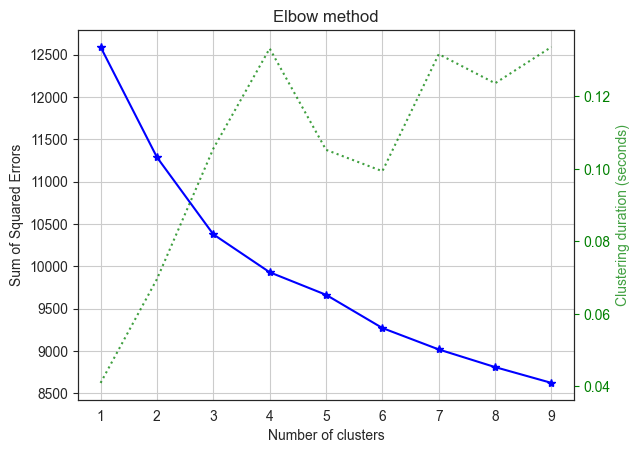

In [183]:
kmeans = KMeans()
skplt.cluster.plot_elbow_curve(kmeans, X=songs_pca, cluster_ranges = range(1, 10),
                                title = 'Elbow method', show_cluster_time = True)
plt.show()

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\2179406643.py:27: UserWarning:

The figure layout has changed to tight

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\2179406643.py:28: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



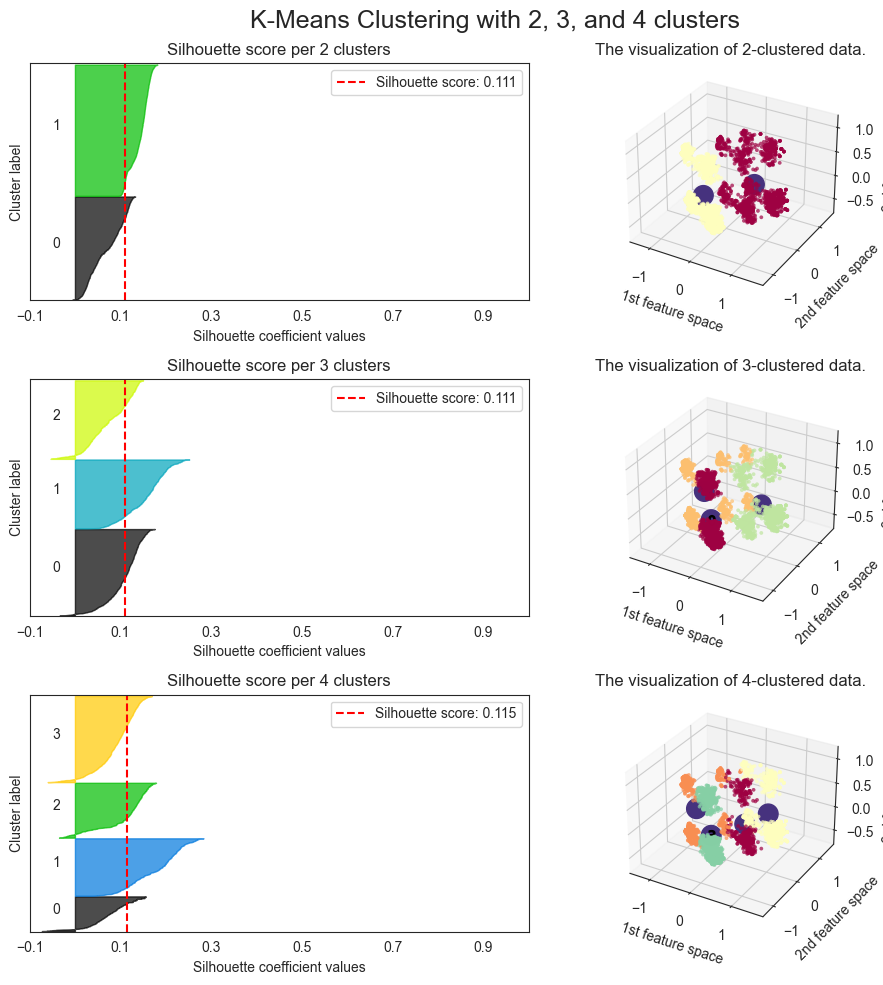

In [184]:
clusters = [2, 3, 4]

fig = plt.figure(constrained_layout=True, figsize=(10,10))
spec = gridspec.GridSpec(ncols=2, nrows=len(clusters), figure=fig)
axs2d = [fig.add_subplot(spec[i, 0]) for i in range(len(clusters))]
axs3d = [fig.add_subplot(spec[i, 1], projection='3d') for i in range(len(clusters))]

for i in range(len(clusters)):
  kmeans = KMeans(n_clusters=clusters[i])
  kmeans.fit(songs_pca)
  pred = kmeans.predict(songs_pca)
  skplt.metrics.plot_silhouette(songs_pca, kmeans.labels_, ax=axs2d[i],
                              title=f"Silhouette score per {clusters[i]} clusters")
  colors = plt.cm.Spectral(pred.astype(float)/clusters[i])
  axs3d[i].scatter(songs_pca[:, 0], songs_pca[:, 1], songs_pca[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors)
  centers = kmeans.cluster_centers_
  axs3d[i].scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='o', alpha=1, s=200)
  for j, c in enumerate(centers):
        axs3d[i].scatter(c[0], c[1], c[2], marker='$%d$' % j, alpha=1, s=50, edgecolor='k')

  axs3d[i].set_title(f"The visualization of {clusters[i]}-clustered data.")
  axs3d[i].set_xlabel("1st feature space")
  axs3d[i].set_ylabel("2nd feature space")
  axs3d[i].set_zlabel("3rd feature space")

fig.suptitle("K-Means Clustering with 2, 3, and 4 clusters", size=18)
fig.tight_layout()
fig.show()

> For a particular K, all the clusters should have a Silhouette score greater than the average score of the data set represented by the red-dotted line. The x-axis represents the Silhouette score.

> There shouldn’t be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points.

https://builtin.com/data-science/elbow-method

## Hierarchical Clustering

### Agglomerative Clustering

- Single Linkage: In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
- Ward Linkage: In ward linkage hierarchical clustering, the distance between two clusters is defined as the sum of the squared distances between all of the points in each cluster.
- Complete Linkage: In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster.
- Average Linkage: In average linkage hierarchical clustering, the distance between two clusters is defined as the average of the distances between all of the points in each cluster.

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\878472784.py:16: UserWarning:

The figure layout has changed to tight

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\878472784.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



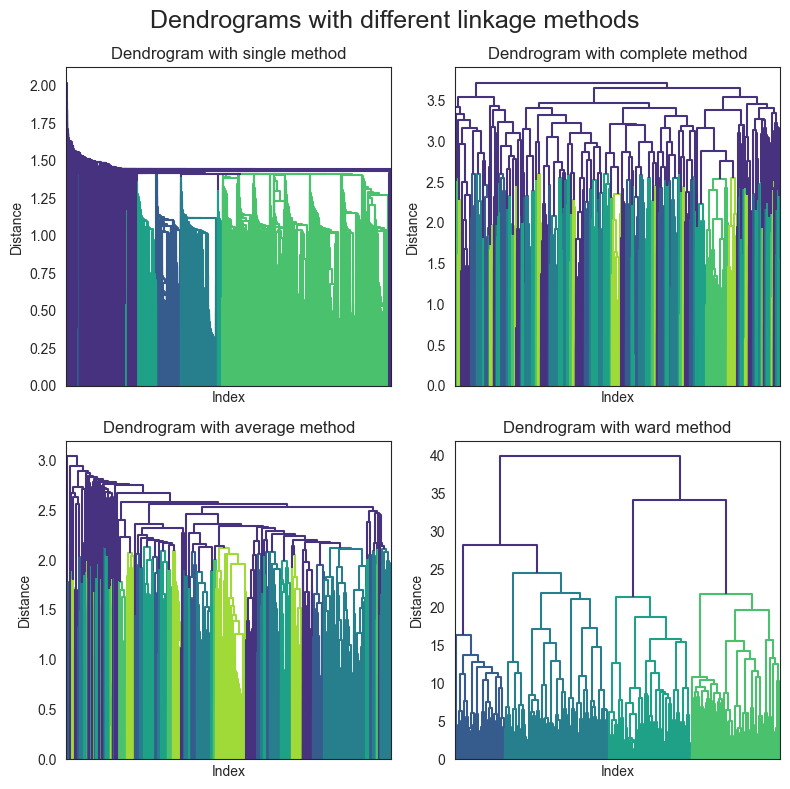

In [185]:
methods = ['single', 'complete', 'average', 'ward']

fig = plt.figure(constrained_layout=True, figsize=(8,8))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
axs = [fig.add_subplot(spec[i//2, i%2]) for i in range(len(methods))]

for i in range(len(methods)):
  linkage_data = linkage(songs_pca, method = methods[i])
  dendrogram(linkage_data, ax=axs[i])
  axs[i].set_title(f"Dendrogram with {methods[i]} method")
  axs[i].set_xlabel("Index")
  axs[i].set_ylabel("Distance")
  axs[i].xaxis.set_tick_params(labelbottom=False)

fig.suptitle("Dendrograms with different linkage methods", size=18)
fig.tight_layout()
fig.show()

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\1514827948.py:19: UserWarning:

The figure layout has changed to tight

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\1514827948.py:20: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



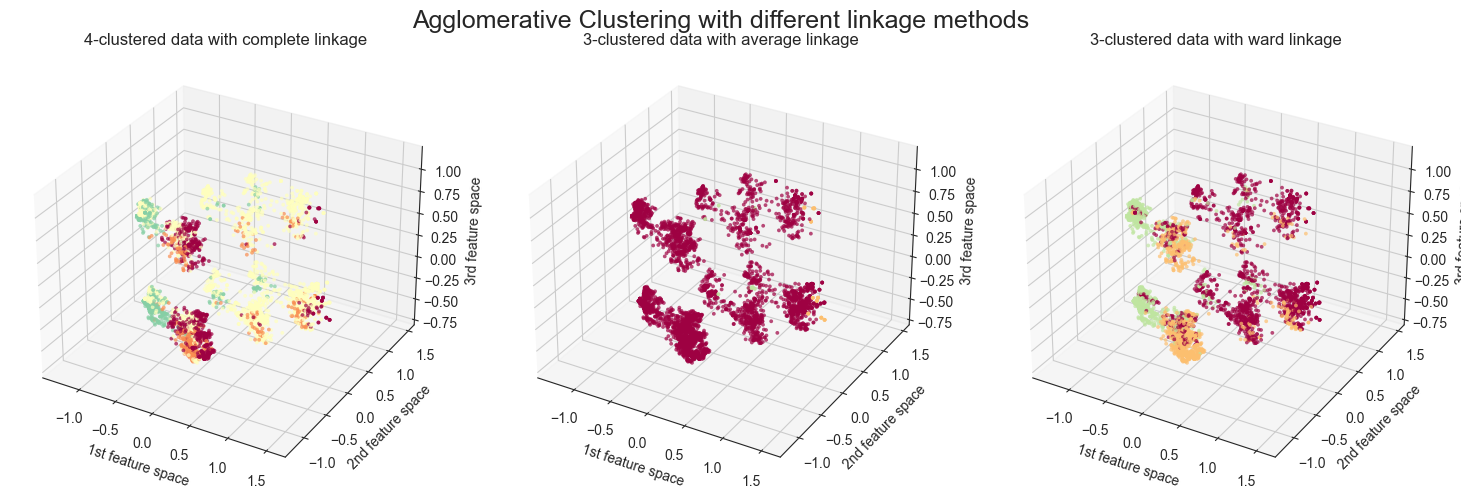

In [186]:
methods = ['complete', 'average', 'ward']
methods_clusters = [4, 3, 3]

fig = plt.figure(constrained_layout=True, figsize=(15,5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
axs = [fig.add_subplot(spec[i], projection='3d') for i in range(len(methods))]

for i in range(len(methods)):
  model = AgglomerativeClustering(n_clusters=methods_clusters[i], linkage=methods[i])
  pred = model.fit_predict(songs_pca)
  colors = plt.cm.Spectral(pred.astype(float)/methods_clusters[i])
  axs[i].scatter(songs_pca[:, 0], songs_pca[:, 1], songs_pca[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors)
  axs[i].set_title(f"{methods_clusters[i]}-clustered data with {methods[i]} linkage")
  axs[i].set_xlabel("1st feature space")
  axs[i].set_ylabel("2nd feature space")
  axs[i].set_zlabel("3rd feature space")

fig.suptitle("Agglomerative Clustering with different linkage methods", size=18)
fig.tight_layout()
fig.show()

## DBSCAN

It is a density based clustering algorithm that is used for unsupervised learning problems.

In a bid to eliminate the problems of K-Means Clustering with nested data and high-dimensional data, DBSCAN Clustering eliminates it! It's has 2 important hyperparameters:

Hyperparameters :
- minPts : It is the minimum number of data points that need to be present in the area of a point to be considered as a core point.
- Epsilon : It is the radius of the area of a center point.

In [187]:
eps_values = np.arange(0.6, 1.2, 0.025)
min_samples = np.arange(1, 10, 1)

params = list(product(eps_values, min_samples))

clusters, sil = [], []
for p in params:
    model = DBSCAN(eps=p[0], min_samples=p[1]).fit(songs_pca)
    clusters.append(len(np.unique(model.labels_)))
    sil.append(silhouette_score(songs_pca, model.labels_))
aux = pd.DataFrame.from_records(params, columns=['eps', 'min_samples'])
aux['silhouette'] = sil

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\3635994559.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



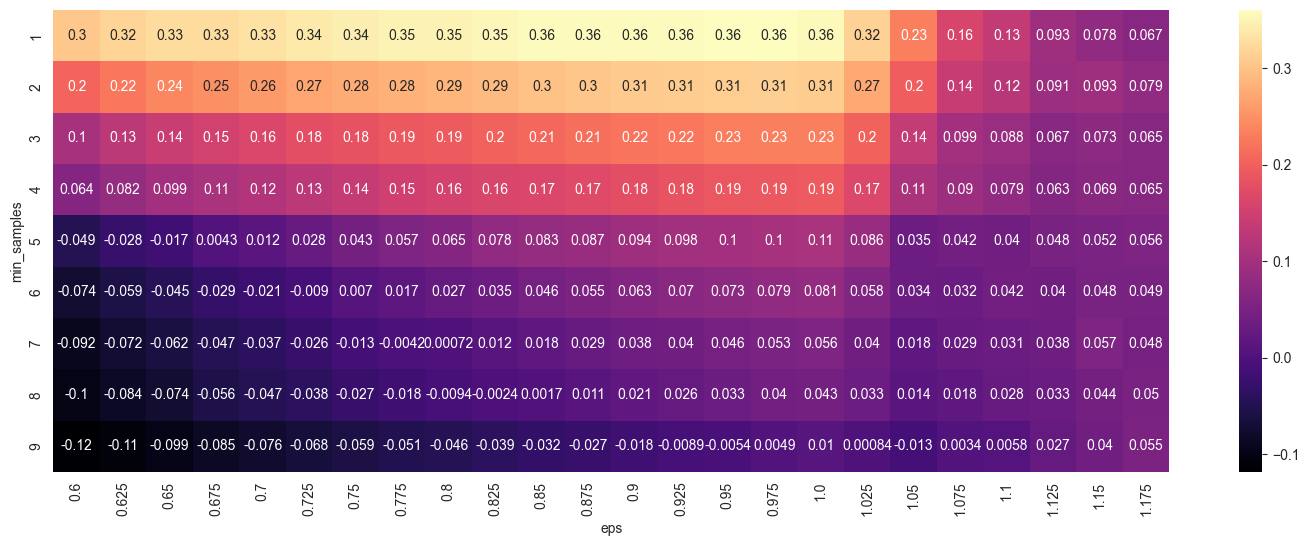

In [188]:
fig, ax = plt.subplots(figsize=(18,6))
pvt = pd.pivot_table(aux, values='silhouette', index='min_samples', columns='eps')
sea.heatmap(pvt, annot=True, annot_kws={"size": 10}, cmap="magma", ax=ax)
ax.set_xticklabels([round(x, 3) for x in eps_values])
fig.show()

In [189]:
dbscan_model= DBSCAN(eps=0.25, min_samples=7).fit(songs_pca)
songs_dbscan = pd.DataFrame(songs_pca).copy()
songs_dbscan.loc[:, 'cluster'] = dbscan_model.labels_
clusters = len(songs_dbscan['cluster'].unique().tolist())
clusters

25

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\2618229557.py:10: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



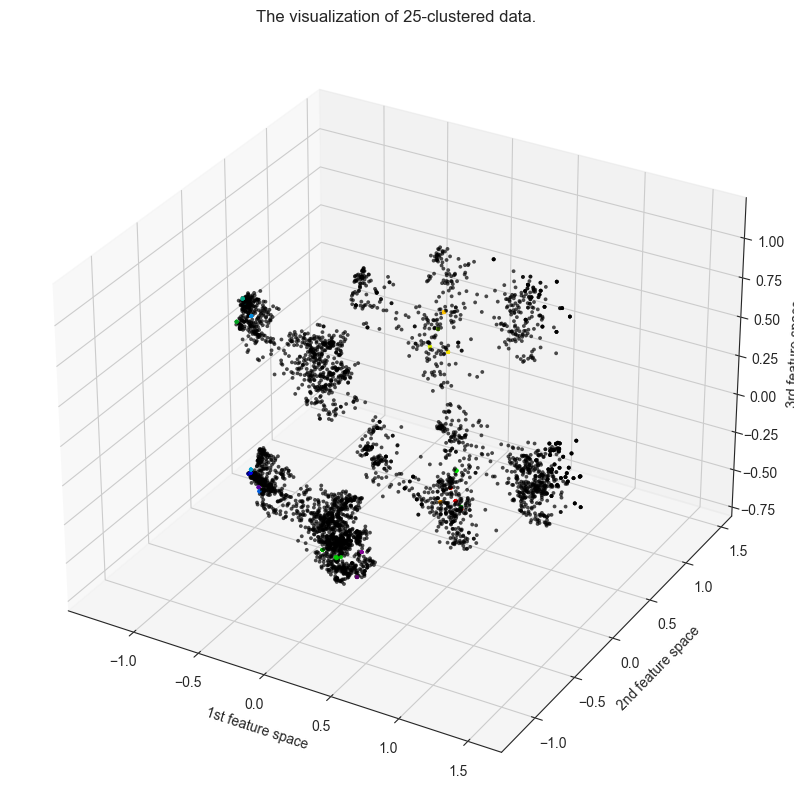

In [190]:
fig = plt.figure(constrained_layout=True, figsize=(8,8))
axs = fig.add_subplot(projection='3d')
colors = plt.cm.nipy_spectral(dbscan_model.labels_.astype(float)/clusters)
axs.scatter(songs_dbscan.iloc[:, 0], songs_dbscan.iloc[:, 1], songs_dbscan.iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors)
axs.set_title(f"The visualization of {clusters}-clustered data.")
axs.set_xlabel("1st feature space")
axs.set_ylabel("2nd feature space")
axs.set_zlabel("3rd feature space")

fig.show()

## Gaussian Mixture Model

It assumes that the data is generated from a mixture of several Gaussian distributions.

GMMs are versatile because they can identify complex patterns in data by modeling clusters with different variances and shapes. They provide probabilities for cluster assignments rather than definitive labels, allowing for soft clustering where data points can belong to multiple clusters with varying degrees of membership.

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14596\3296207007.py:13: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



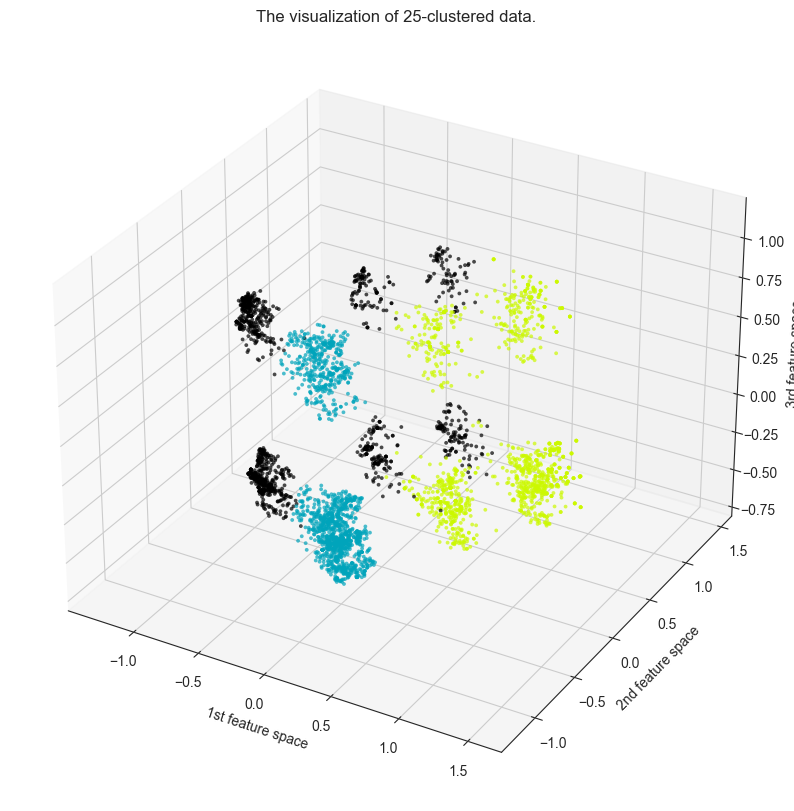

In [191]:
songs_gmm = pd.DataFrame(songs_pca).copy()
songs_gmm['cluster'] = GaussianMixture(n_components=3).fit_predict(songs_pca)

fig = plt.figure(constrained_layout=True, figsize=(8,8))
axs = fig.add_subplot(projection='3d')
colors = plt.cm.nipy_spectral(songs_gmm.cluster.astype(float)/3)
axs.scatter(songs_gmm.iloc[:, 0], songs_gmm.iloc[:, 1], songs_gmm.iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors)
axs.set_title(f"The visualization of {clusters}-clustered data.")
axs.set_xlabel("1st feature space")
axs.set_ylabel("2nd feature space")
axs.set_zlabel("3rd feature space")

fig.show()